In [1]:
import os
import pandas as pd
import seaborn as sns
import shutil
import os
import random
import matplotlib.pyplot as plt
import csv

In [2]:
for subdir in ['merged_outputs','graphs']:
    if not os.path.exists(subdir):
        os.makedirs(subdir)

In [3]:
input_files = os.path.join('input_files')
out_files = os.path.join('merged_outputs')

files_list = os.listdir(input_files)
print(files_list)

for i in range(0,len(files_list)):
    if files_list[i].endswith(".interfacea"):
        with open(input_files +"/"+ files_list[i], "r") as f:
            lines = f.readlines()
        
        with open(out_files +"/"+ "hydrophobics","a") as d:
            for j in range(1,len(lines)):
                if lines[j].split()[1] == 'hydrophobic':
                    for  k in range(1,len(lines[j].split())-1):
                        d.write(lines[j].split()[k] + "\t")
                    d.write(lines[j].split()[-1] +"\n")
                    
        with open(out_files +"/" + "hbonds","a") as d:
            for j in range(1,len(lines)):
                if lines[j].split()[1] == 'hbond':
                    for  k in range(1,len(lines[j].split())-1):
                        d.write(lines[j].split()[k] + "\t")
                    d.write(lines[j].split()[-1] +"\n")
                    
        with open(out_files +"/" + "ionics","a") as d:
            for j in range(1,len(lines)):
                if lines[j].split()[1] == 'ionic':
                    for  k in range(1,len(lines[j].split())-1):
                        d.write(lines[j].split()[k] + "\t")
                    d.write(lines[j].split()[-1] +"\n")

['complex_md-3.interfacea', '.DS_Store', 'complex_md-6.interfacea', 'complex_md-1.interfacea', 'complex_md-10.interfacea', 'complex_md-9.interfacea', 'complex_md-4.interfacea', 'complex_md-7.interfacea', 'complex_md-2.interfacea', '.ipynb_checkpoints', 'complex_md-8.interfacea', 'complex_md-5.interfacea']


In [6]:
a=pd.read_csv(out_files+"/hbonds", sep="\t", header=None)

a.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
a

,itype,chain_a,chain_b,resname_a,resname_b,resid_a,resid_b,atom_a,atom_b
0,hbond,A,A,GLN,ILE,27,5,O,N
1,hbond,A,A,ARG,ASP,6,73,N,OD1
2,hbond,A,A,ARG,VAL,30,7,O,N
3,hbond,A,A,LEU,LEU,74,8,O,N
4,hbond,A,A,ILE,SER,32,9,O,N
...,...,...,...,...,...,...,...,...,...
2683,hbond,B,C,DG,DC,285,302,O6,N4
2684,hbond,B,C,DA,DT,284,303,N1,N3
2685,hbond,A,D,GLU,SAM,35,304,OE2,O3'
2686,hbond,A,D,GLU,SAM,35,304,OE1,O2'


In [7]:
a["resname_a"] = a["resname_a"].astype(str) + a["resid_a"].astype(str)
a["resname_b"] = a["resname_b"].astype(str) + a["resid_b"].astype(str)

b=a.drop(columns=['resid_a','resid_b'])
b

,itype,chain_a,chain_b,resname_a,resname_b,atom_a,atom_b
0,hbond,A,A,GLN27,ILE5,O,N
1,hbond,A,A,ARG6,ASP73,N,OD1
2,hbond,A,A,ARG30,VAL7,O,N
3,hbond,A,A,LEU74,LEU8,O,N
4,hbond,A,A,ILE32,SER9,O,N
...,...,...,...,...,...,...,...
2683,hbond,B,C,DG285,DC302,O6,N4
2684,hbond,B,C,DA284,DT303,N1,N3
2685,hbond,A,D,GLU35,SAM304,OE2,O3'
2686,hbond,A,D,GLU35,SAM304,OE1,O2'


### Intermonomer interactions

In [8]:
b_inter = b.loc[((b["chain_a"] == "A") & (b["chain_b"] == "B")) | ((b["chain_a"] == "A") & (b["chain_b"] == "C")) ]
b_inter

,itype,chain_a,chain_b,resname_a,resname_b,atom_a,atom_b
70,hbond,A,C,ASN82,DG299,ND2,O3'
71,hbond,A,C,ASN82,DC300,ND2,OP1
72,hbond,A,C,SER85,DC298,OG,OP1
74,hbond,A,C,ASN88,DG299,ND2,O3'
78,hbond,A,B,ARG91,DA291,NH1,O4'
...,...,...,...,...,...,...,...
2602,hbond,A,C,LYS215,DT296,N,OP2
2664,hbond,A,B,VAL87,DG289,O,N2
2674,hbond,A,C,ILE86,DG297,O,N2
2677,hbond,A,C,GLU127,DC298,OE1,N4


### Pairwise interactions

In [10]:
b_inter['pairwise'] = b_inter['resname_a'].str.cat(b_inter['resname_b'],sep="-")

b_inter

<ipython-input-10-e94161861d04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_inter['pairwise'] = b_inter['resname_a'].str.cat(b_inter['resname_b'],sep="-")


,itype,chain_a,chain_b,resname_a,resname_b,atom_a,atom_b,pairwise
70,hbond,A,C,ASN82,DG299,ND2,O3',ASN82-DG299
71,hbond,A,C,ASN82,DC300,ND2,OP1,ASN82-DC300
72,hbond,A,C,SER85,DC298,OG,OP1,SER85-DC298
74,hbond,A,C,ASN88,DG299,ND2,O3',ASN88-DG299
78,hbond,A,B,ARG91,DA291,NH1,O4',ARG91-DA291
...,...,...,...,...,...,...,...,...
2602,hbond,A,C,LYS215,DT296,N,OP2,LYS215-DT296
2664,hbond,A,B,VAL87,DG289,O,N2,VAL87-DG289
2674,hbond,A,C,ILE86,DG297,O,N2,ILE86-DG297
2677,hbond,A,C,GLU127,DC298,OE1,N4,GLU127-DC298


### Interaction frequencies

In [11]:
b_inter['aa_freq'] = b_inter.groupby('resname_a')['resname_a'].transform('count')
b_inter['nuc_freq'] = b_inter.groupby('resname_b')['resname_b'].transform('count')
b_inter['all_freq'] = b_inter.groupby('itype')['itype'].transform('count')
b_inter['pair_freq'] = b_inter.groupby('pairwise')['pairwise'].transform('count')

b_inter

#b_inter_sorted=b_inter.sort_values(('pair_freq') , ascending=False)


<ipython-input-11-063ba349f9f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_inter['aa_freq'] = b_inter.groupby('resname_a')['resname_a'].transform('count')
<ipython-input-11-063ba349f9f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_inter['nuc_freq'] = b_inter.groupby('resname_b')['resname_b'].transform('count')
<ipython-input-11-063ba349f9f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,itype,chain_a,chain_b,resname_a,resname_b,atom_a,atom_b,pairwise,aa_freq,nuc_freq,all_freq,pair_freq
70,hbond,A,C,ASN82,DG299,ND2,O3',ASN82-DG299,14,25,190,5
71,hbond,A,C,ASN82,DC300,ND2,OP1,ASN82-DC300,14,11,190,9
72,hbond,A,C,SER85,DC298,OG,OP1,SER85-DC298,9,42,190,9
74,hbond,A,C,ASN88,DG299,ND2,O3',ASN88-DG299,6,25,190,4
78,hbond,A,B,ARG91,DA291,NH1,O4',ARG91-DA291,30,10,190,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2602,hbond,A,C,LYS215,DT296,N,OP2,LYS215-DT296,6,11,190,6
2664,hbond,A,B,VAL87,DG289,O,N2,VAL87-DG289,7,7,190,7
2674,hbond,A,C,ILE86,DG297,O,N2,ILE86-DG297,10,30,190,10
2677,hbond,A,C,GLU127,DC298,OE1,N4,GLU127-DC298,15,42,190,15


## Amino-acid and nucleotide specific interactions

In [12]:
b_spec_nuc = b_inter.drop(b_inter.index[b_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])


b_spec_nuc_and_res = b_spec_nuc.drop(b_spec_nuc.index[b_spec_nuc['atom_a'].isin(["N","CA","C","O","H","HA"])])
b_spec_nuc_and_res

,itype,chain_a,chain_b,resname_a,resname_b,atom_a,atom_b,pairwise,aa_freq,nuc_freq,all_freq,pair_freq
79,hbond,A,B,ARG91,DC290,NH1,O2,ARG91-DC290,30,20,190,20
81,hbond,A,B,ARG91,DC290,NH2,O2,ARG91-DC290,30,20,190,20
172,hbond,A,B,ARG207,DG287,NH1,O6,ARG207-DG287,13,12,190,12
254,hbond,A,C,GLU127,DC298,OE1,N4,GLU127-DC298,15,42,190,15
255,hbond,A,C,GLU127,DC298,OE2,N4,GLU127-DC298,15,42,190,15
347,hbond,A,B,ARG91,DC290,NH1,O2,ARG91-DC290,30,20,190,20
349,hbond,A,B,ARG91,DC290,NH2,O2,ARG91-DC290,30,20,190,20
440,hbond,A,B,ARG207,DG287,NH1,O6,ARG207-DG287,13,12,190,12
527,hbond,A,C,GLU127,DC298,OE1,N4,GLU127-DC298,15,42,190,15
610,hbond,A,B,ARG91,DC290,NH1,O2,ARG91-DC290,30,20,190,20


### Recalculate the changed frequency

In [13]:
b_spec_nuc_and_res['aa_freq'] = b_spec_nuc_and_res.groupby('resname_a')['resname_a'].transform('count')
b_spec_nuc_and_res['nuc_freq'] = b_spec_nuc_and_res.groupby('resname_b')['resname_b'].transform('count')
b_spec_nuc_and_res['all_freq'] = b_spec_nuc_and_res.groupby('itype')['itype'].transform('count')

b_spec_nuc_and_res

,itype,chain_a,chain_b,resname_a,resname_b,atom_a,atom_b,pairwise,aa_freq,nuc_freq,all_freq,pair_freq
79,hbond,A,B,ARG91,DC290,NH1,O2,ARG91-DC290,20,20,48,20
81,hbond,A,B,ARG91,DC290,NH2,O2,ARG91-DC290,20,20,48,20
172,hbond,A,B,ARG207,DG287,NH1,O6,ARG207-DG287,13,12,48,12
254,hbond,A,C,GLU127,DC298,OE1,N4,GLU127-DC298,15,15,48,15
255,hbond,A,C,GLU127,DC298,OE2,N4,GLU127-DC298,15,15,48,15
347,hbond,A,B,ARG91,DC290,NH1,O2,ARG91-DC290,20,20,48,20
349,hbond,A,B,ARG91,DC290,NH2,O2,ARG91-DC290,20,20,48,20
440,hbond,A,B,ARG207,DG287,NH1,O6,ARG207-DG287,13,12,48,12
527,hbond,A,C,GLU127,DC298,OE1,N4,GLU127-DC298,15,15,48,15
610,hbond,A,B,ARG91,DC290,NH1,O2,ARG91-DC290,20,20,48,20


## Let's visualize our interaction data

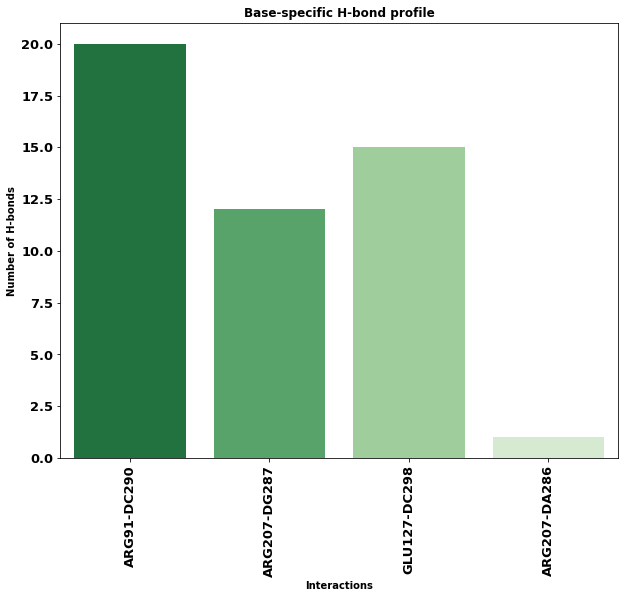

In [15]:
graphs = os.path.join('graphs')

plt.figure(figsize=(10,8))
ax = sns.barplot(x="pairwise", y="pair_freq", palette="Greens_r", data=b_spec_nuc_and_res)
plt.xticks(rotation='vertical')


plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
#plt.ylim(ymax = 0.38, ymin = -0.02)
plt.xlabel('Interactions',  fontweight='bold')
plt.ylabel('Number of H-bonds', fontweight='bold')
plt.title("Base-specific H-bond profile", fontweight='bold')

plt.savefig(graphs+"/base-spec-hbond-pairwise.png", dpi=600, bbox_inches='tight', format="png")
